In [2]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [3]:
from transformers import AutoTokenizer
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import csv
import numpy as np

In [4]:
MODEL_NAME = "klue/roberta-small"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

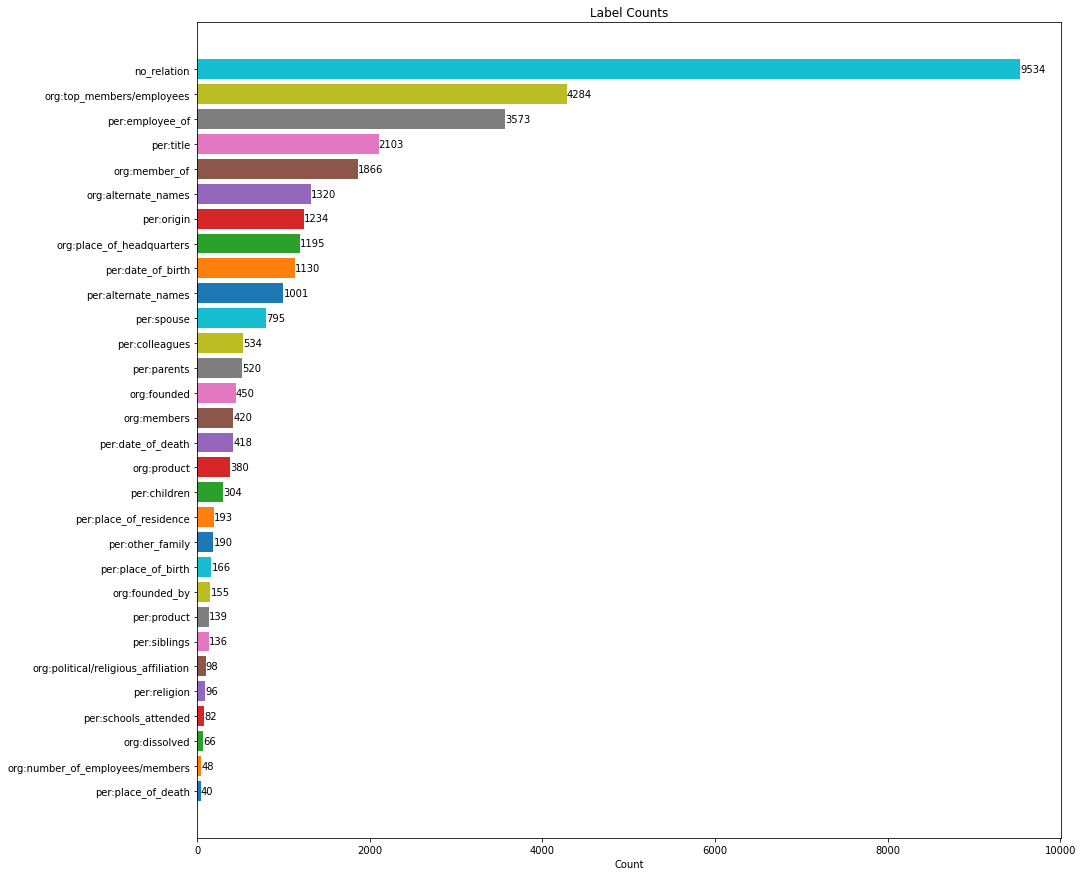

In [6]:
''' Dataset의 분포를 label에 따라 시각화'''


csv_file = "../dataset/train/train.csv"
df = pd.read_csv(csv_file)

# 라벨 열 이름을 'label_column'로 가정하고 빈도수 계산
label_counts = df['label'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(20, len(label_counts) * 0.5))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
bars = ax.barh(label_counts.index, label_counts.values, color=colors[:len(label_counts)])

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, i, f'{width}', ha='left', va='center')


ax.set_xlabel('Count')
ax.set_title('Label Counts')
ax.tick_params(axis='y', which='major', labelsize=10)
plt.subplots_adjust(left=0.3)

plt.show()

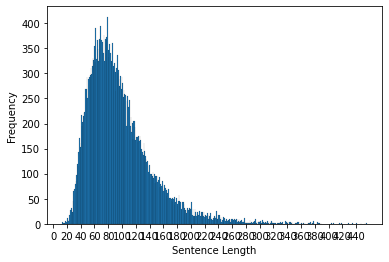

In [7]:
'''문장 길이별 빈도수 시각화'''


csv_file = "../dataset/train/train.csv"
length_counts = {}

with open(csv_file, "r", encoding="utf-8") as f:
    reader = csv.reader(f)
    next(reader)

    for row in reader:
        sentence = row[1]
        sentence_length = len(sentence)

        if sentence_length in length_counts:
            length_counts[sentence_length] += 1
        else:
            length_counts[sentence_length] = 1


plt.bar(length_counts.keys(), length_counts.values(), width=1, align="center", edgecolor="black", linewidth=0.1)
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.xticks(range(0, max(length_counts.keys())+1, 20))
plt.show()

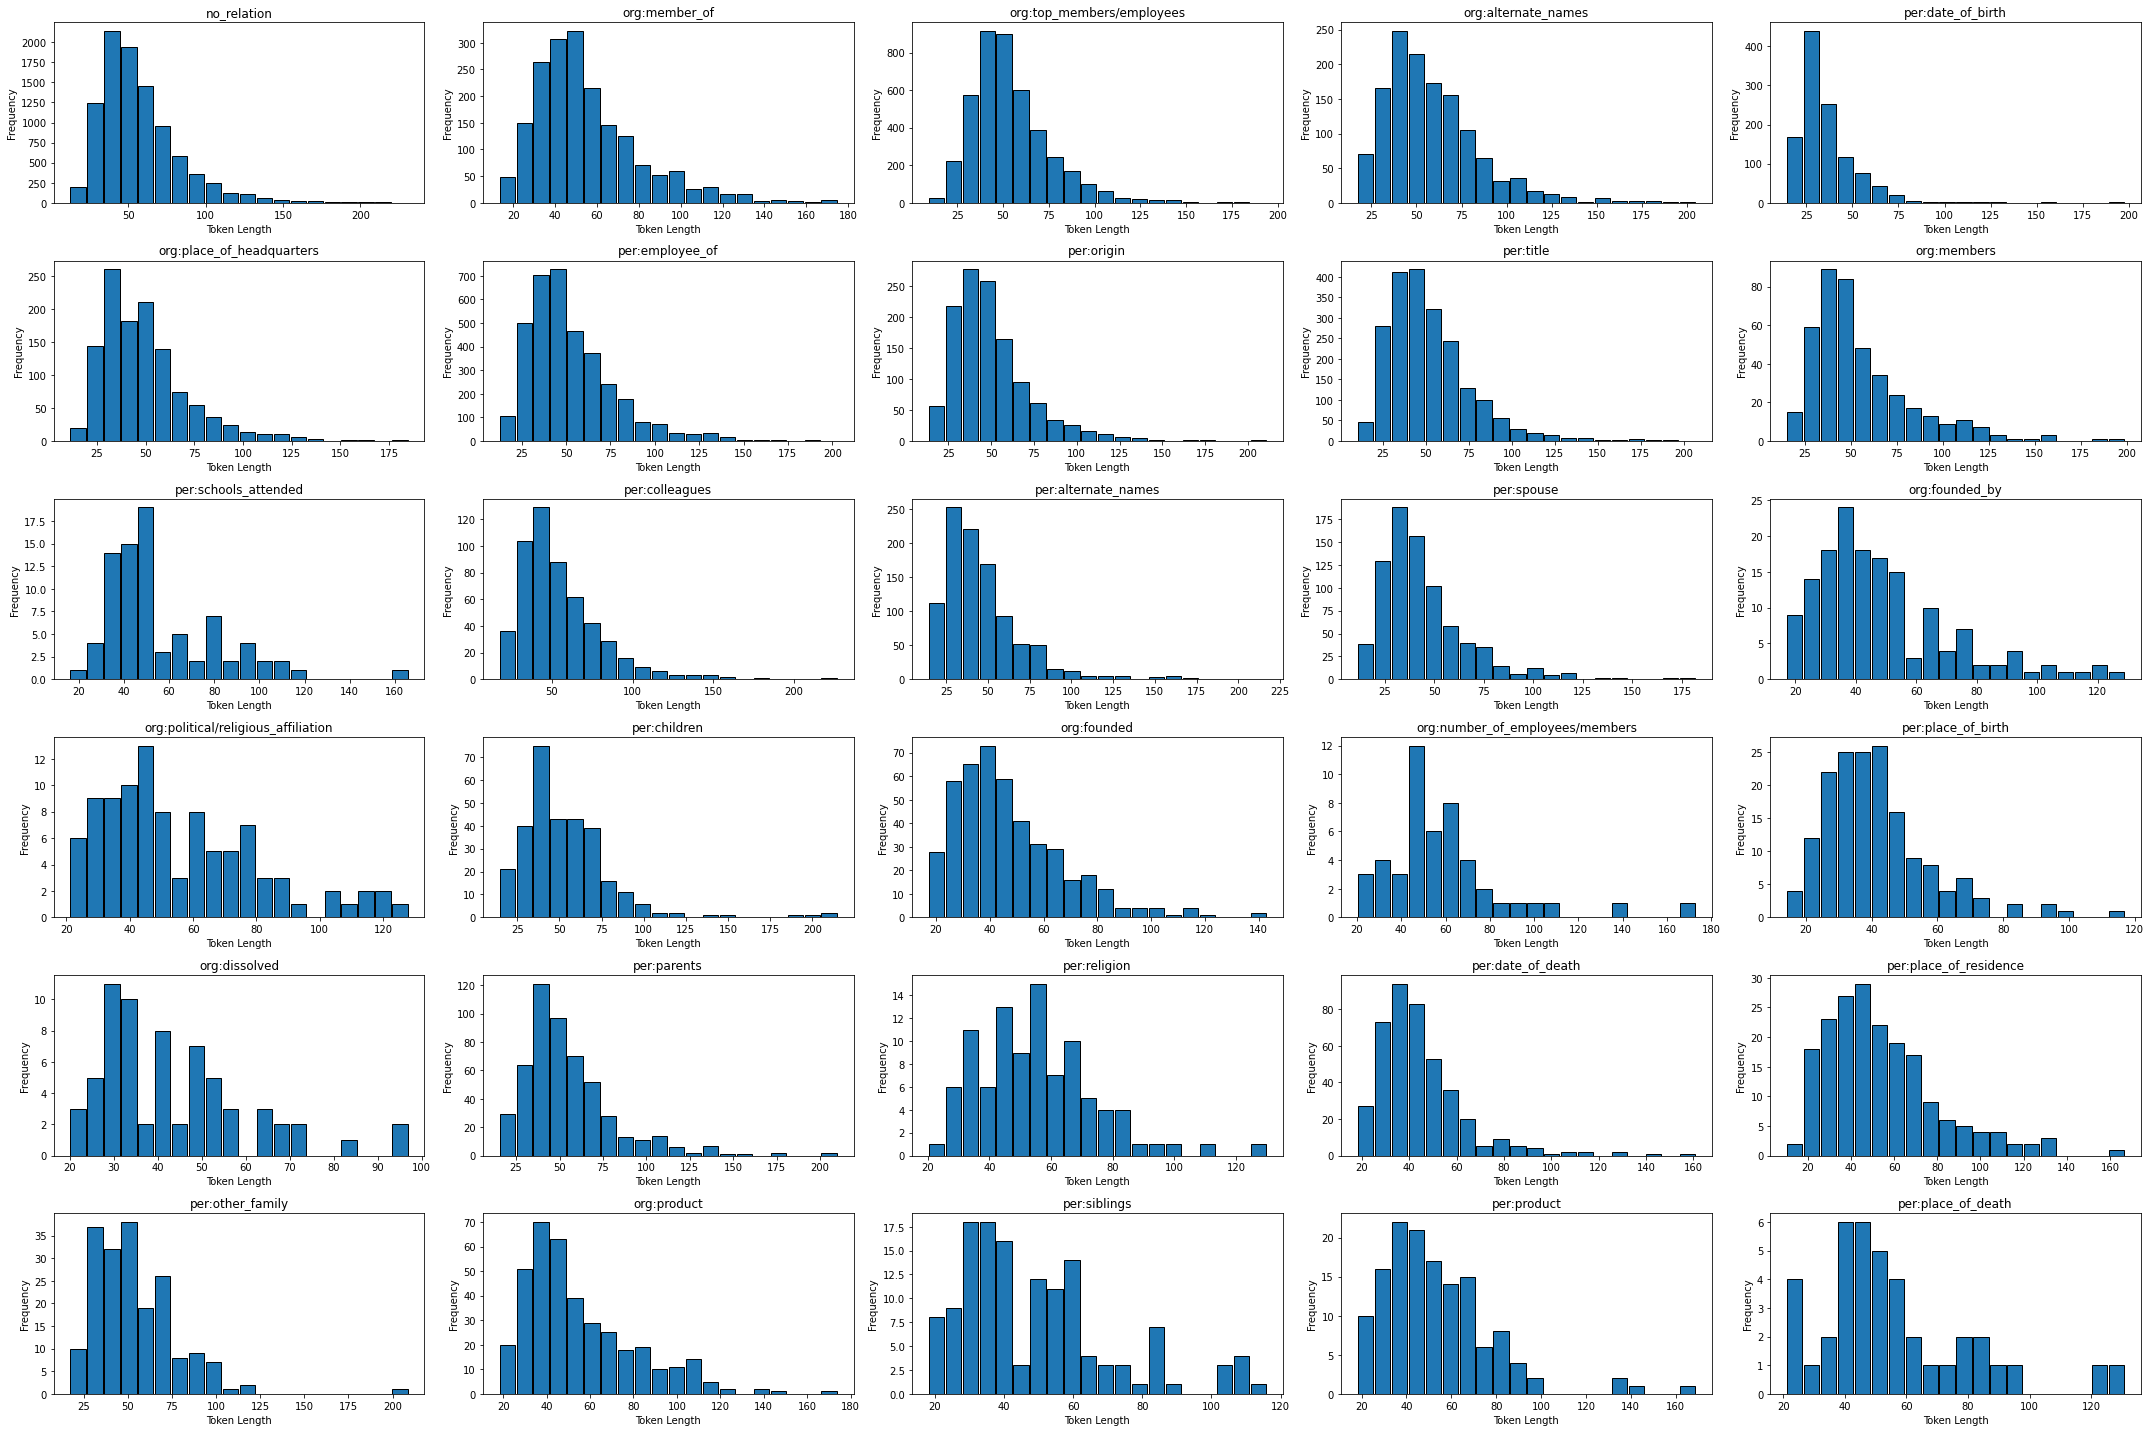

In [8]:
'''각 라벨별로 토큰 길이에 따른 빈도수 계산'''


grouped = {}
for label in df['label'].unique():
    temp_df = df[df['label'] == label]
    lengths = []
    for sentence in temp_df['sentence']:
        tokenized = tokenizer.encode(sentence, add_special_tokens=True)
        length = len(tokenized)
        lengths.append(length)
    grouped[label] = lengths

# subplot 생성 및 그래프 그리기
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(30, 20), tight_layout=True)
for i, label in enumerate(df['label'].unique()):
    row_idx = i // 5
    col_idx = i % 5
    ax = axs[row_idx][col_idx]
    if label in grouped:
        ax.hist(grouped[label], bins=20, rwidth=0.9, edgecolor='black')
    ax.set_title(label)
    ax.set_xlabel("Token Length")
    ax.set_ylabel("Frequency")

plt.show()

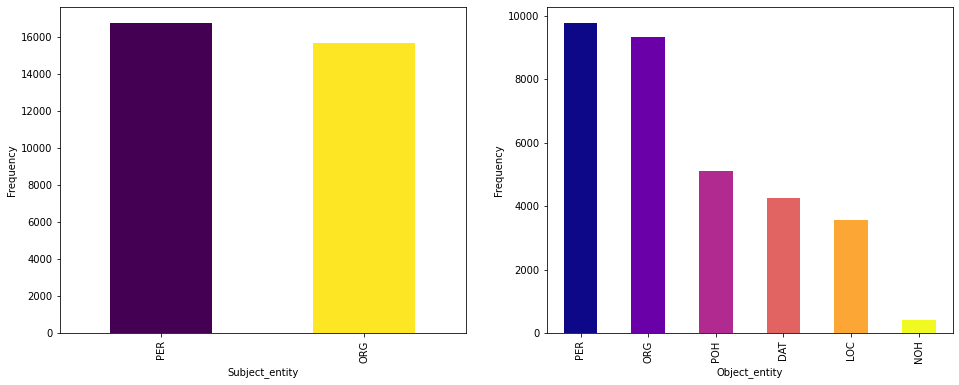

In [9]:
'''train.csv의 subject_entity & object entity 분포'''


# 'subject_entity' 열의 딕셔너리에서 'type'에 대한 value 값 추출
df['subject_entity_type'] = df['subject_entity'].apply(lambda x: eval(x)['type'])
# 'object_entity' 열의 딕셔너리에서 'type'에 대한 value 값 추출
df['object_entity_type'] = df['object_entity'].apply(lambda x: eval(x)['type'])

# 'type' 값별 빈도수 계산
subject_type_count = df['subject_entity_type'].value_counts()
object_type_count = df['object_entity_type'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

colors1 = plt.cm.viridis(np.linspace(0, 1, len(subject_type_count)))
colors2 = plt.cm.plasma(np.linspace(0, 1, len(object_type_count)))

subject_type_count.plot(kind='bar', ax=axes[0], color=colors1)
axes[0].set_xlabel('Subject_entity')
axes[0].set_ylabel('Frequency')

object_type_count.plot(kind='bar', ax=axes[1], color=colors2)
axes[1].set_xlabel('Object_entity')
axes[1].set_ylabel('Frequency')

plt.show()

In [10]:
'''train data의 Data frame 10개 확인'''

df.head(10)

,id,sentence,subject_entity,object_entity,label,source,subject_entity_type,object_entity_type
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,ORG,PER
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,ORG,ORG
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,ORG,ORG
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,ORG,PER
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,ORG,DAT
5,5,": 유엔, 유럽 의회, 북대서양 조약 기구 (NATO), 국제이주기구, 세계 보건 ...","{'word': '북대서양 조약 기구', 'start_idx': 13, 'end_i...","{'word': 'NATO', 'start_idx': 25, 'end_idx': 2...",org:alternate_names,wikipedia,ORG,ORG
6,6,그에 따라 나폴리와 계약을 연장한 마라도나는 1989년 팀을 UEFA컵 정상으로 인...,"{'word': 'AC 밀란', 'start_idx': 64, 'end_idx': ...","{'word': '1989', 'start_idx': 25, 'end_idx': 2...",no_relation,wikipedia,ORG,DAT
7,7,"박용오(朴容旿, 1937년 4월 29일(음력 3월 19일)(음력 3월 19일) ~ ...","{'word': '박용오', 'start_idx': 0, 'end_idx': 2, ...","{'word': '1937년 4월 29일', 'start_idx': 9, 'end_...",per:date_of_birth,wikipedia,PER,DAT
8,8,중공군에게 온전히 대항할 수 없을 정도로 약해진 국민당은 타이베이로 수도를 옮기는 ...,"{'word': '중화민국', 'start_idx': 59, 'end_idx': 6...","{'word': '타이베이', 'start_idx': 32, 'end_idx': 3...",org:place_of_headquarters,wikipedia,ORG,LOC
9,9,"특히 김동연 전 경제부총리를 비롯한 김두관 국회의원, 안규백 국회의원, 김종민 국회...","{'word': '안규백', 'start_idx': 30, 'end_idx': 32...","{'word': '더불어민주당', 'start_idx': 100, 'end_idx'...",per:employee_of,wikitree,PER,ORG


In [11]:
with open(csv_file, 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    sentence_count = sum(1 for row in reader)

print(f"중복 문장 제거 전 문장 개수: {sentence_count}")

중복 문장 제거 전 문장 개수: 32470


In [12]:
'''train data의 sentence, subject_entity, object_entity, label가 같은 문장 제거(중복문장 제거)'''


# sentence, subject_entity, object_entity, label 전부 동일한 것들 제거
df = df.drop_duplicates(subset=['subject_entity', 'object_entity', 'sentence', 'label'])

# 중복 문장 제거 후 개수 출력
num_after = len(df)
print("중복 문장 제거 후 문장 개수:", num_after)
df.to_csv("../dataset/train/train_no_dup.csv", index=False)

중복 문장 제거 후 문장 개수: 32428
